Алгоритм Харриса для обнаружения углов на изображении с помощью библиотеки OpenCV. Этот алгоритм используется для нахождения точек изображения, где происходит резкое изменение интенсивности пикселей (то есть, угол или поворот).


Углы — это места, где интенсивность (яркость) изображения меняется в разных направлениях. Например, угол может быть в месте пересечения двух линий или в точке поворота объекта. Углы важны для распознавания объектов, отслеживания движений и других задач компьютерного зрен


In [24]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [27]:
def CornerDetect(filename):
    filename = filename
    img = cv.imread(filename)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    gray = np.float32(gray)
    dst = cv.cornerHarris(gray, 2, 3, 0.04)
    # result is dilated for marking the corners, not important
    dst = cv.dilate(dst, None)
    # Threshold for an optimal value, it may vary depending on the image.
    img[dst > 0.01*dst.max()] = [255, 0, 0]
    plt.imshow(img)
    plt.show()

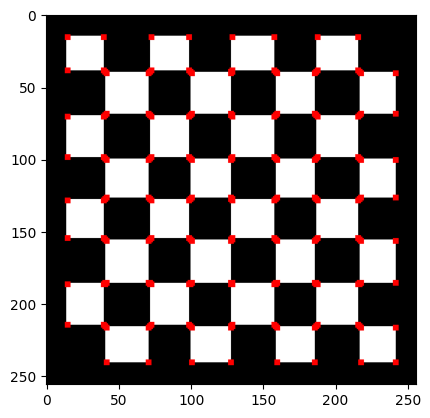

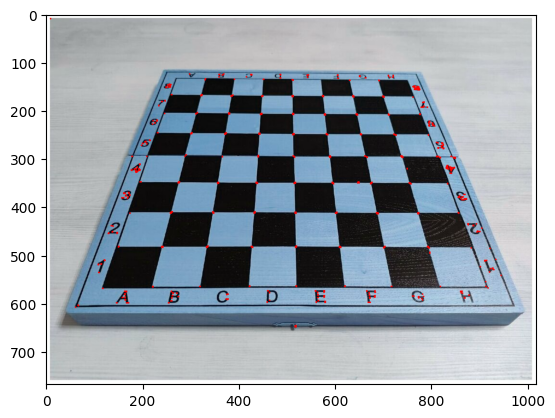

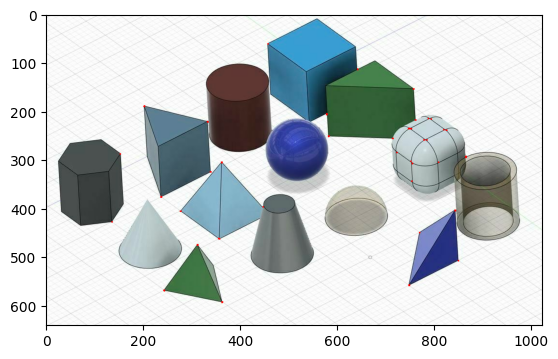

In [26]:
CornerDetect(
    '../../image4labs/chestboard_top.png')
CornerDetect(
    '../../image4labs/chestboard_side.jpg')
CornerDetect(
    '../../image4labs/figure.jpeg')

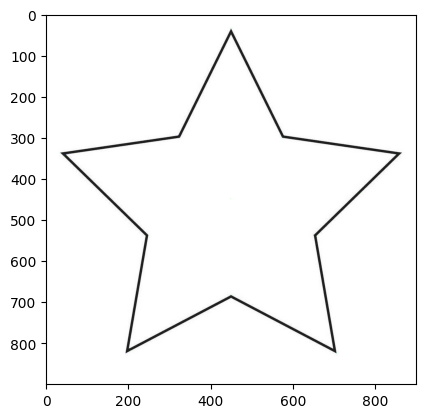

In [45]:
import numpy as np
import cv2 as cv
filename = '../../image4labs/star.jpg'
img = cv.imread(filename)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# find Harris corners
gray = np.float32(gray)
dst = cv.cornerHarris(gray, 2, 3, 0.01)
dst = cv.dilate(dst, None)
ret, dst = cv.threshold(dst, 0.01*dst.max(), 255, 0)
dst = np.uint8(dst)
# find centroids
ret, labels, stats, centroids = cv.connectedComponentsWithStats(dst)
# define the criteria to stop and refine the corners
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv.cornerSubPix(gray, np.float32(
    centroids), (5, 5), (-1, -1), criteria)
# Now draw them
res = np.hstack((centroids, corners))
res = np.intp(res)
img[res[:, 1], res[:, 0]] = [0, 0, 255]
img[res[:, 3], res[:, 2]] = [0, 255, 0]
plt.imshow(img)